# README
Introductory information to be found here.

This notebook will explain the problem and show an example solution.

All markdown comments will be found in the cell above the cell it references.

This has been recently updated to be Event - oriented and as such particleController will play a lesser role and all operations will go through oogenerateEvents.py

In [27]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Import the particleController module that is used as a control module overseeing all events. Then let's create an event with 20 particles! 

In [30]:
import Generation.particleController as pc
cont = pc.particleController()
this_event = cont.generateEvent(20)

Events by default have 8 detectors with radii of range 1000 - 8000 incrementing by 1000. Let's see what that looks like:

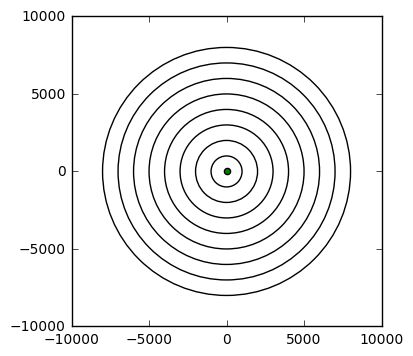

In [32]:
this_event.plotDetectors()
this_event.clearPlot() #for future plotting!

Let's look at the particles we've generated. The format is:
particle barcode, [x, y, z], [momentum, theta, phi], charge

In [34]:
this_event.printParticles()

10,[-0.0245128, 0.0033956, 0],[4141.19, 2.98473, 0.29354],0
9,[0.0073583, 0.0080366, 0],[6961.92, 1.73599, 2.85239],-1
19,[-0.0207549, 0.0095377, 0],[8005.15, 2.58155, 2.72752],-1
13,[0.0226059, -0.0187697, 0],[6041.76, 3.59885, -3.90214],-1
15,[0.0185006, 0.0071674, 0],[10727.7, 1.18471, -1.78213],0
16,[0.0209597, 0.0095173, 0],[7166.57, 3.35225, -1.0206],-1
1,[-0.0032087, -0.0290484, 0],[8144.34, 0.7848, -0.51124],0
5,[0.0258946, 0.0200074, 0],[9031.7, 1.59798, -2.61845],-1
3,[0.0243159, -0.007621, 0],[9581.41, 2.56879, -1.50833],0
12,[0.0232392, 0.0279105, 0],[8174.33, 1.01646, -3.95151],-1
14,[0.0037001, 0.0087288, 0],[11743.16, 0.01722, 3.49065],1
18,[0.0103979, 0.0013797, 0],[8039.01, 1.13878, -3.24909],-1
6,[-0.0051338, -0.0011626, 0],[10890.28, 0.17314, -1.34424],1
2,[-0.0127006, 0.0070185, 0],[13128.47, 0.15241, 3.05108],1
11,[-0.0046092, -0.0261355, 0],[7842.97, 1.56991, 3.98999],1
7,[-0.017693, 7.72e-05, 0],[6643.52, 1.4137, 1.05287],-1
17,[-0.007748, -0.0085864, 0],[11423.3

And let's also see what the hits between the detectors and particles look like: 
The format is as follows (don't worry, this will be shuffled in datasets):
hit_id, particle_id, event_id, x, y

In [35]:
this_event.printallHits()

133,10,1,841.3998722043519, 540.3782694792801
38,10,1,1682.824257208704, 1080.7531433585602
75,10,1,2524.248642213056, 1621.1280172378406
105,10,1,3365.6730272174077, 2161.5028911171207
155,10,1,4207.09741222176, 2701.8777649964013
141,10,1,5048.5217972261125, 3242.2526388756814
51,10,1,5889.946182230465, 3782.6275127549616
151,10,1,6731.370567234816, 4323.002386634241
55,9,1,976.47698732451317, 215.62164368551288
138,9,1,1978.9916920534999, 289.1226085646465
139,9,1,2992.2176202820729, 215.94840326681276
123,9,1,3999.990515705224, -8.7105836920263755
126,9,1,4984.7608365015976, -390.07615010391896
89,9,1,5926.8576463050013, -934.00130644230603
25,9,1,6803.4134871353535, -1647.290175732488
61,9,1,7586.6676695363221, -2538.2028429604093
57,19,1,938.82725941402975, 344.38841005635231
157,19,1,1917.1542455182766, 569.66621708790865
153,19,1,2923.991903194777, 671.02261515643909
18,19,1,3947.9098814342901, 643.43419871303684
107,19,1,4976.755938528453, 481.5603060072342
49,19,1,5997.311632

Let's have a look at these hits. The green dot in the center is the point (0, 0)

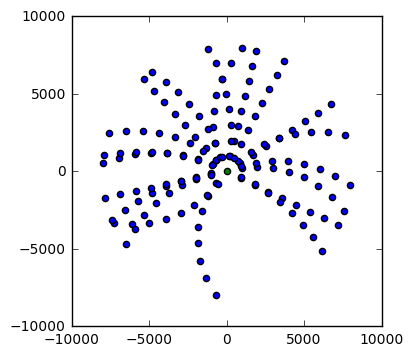

In [36]:
this_event.plotParticle_hits()

Here we can see the hits are all intersections with the detectors. 

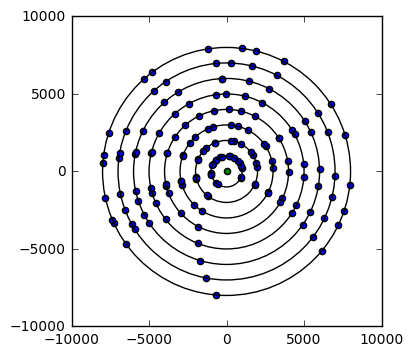

In [37]:
this_event.plotDetectors()

Here we can see that the origins of particles are not exactly (0, 0). This is (probably) not knowledge that will be useful for predicting path but a fun fact.

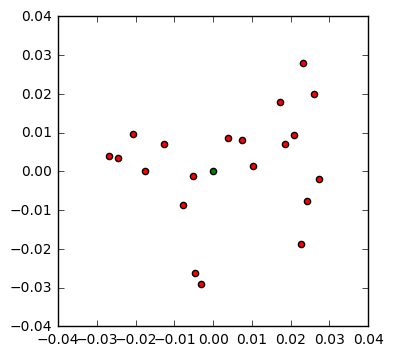

In [38]:
this_event.clearPlot()
this_event.plotParticle_origins()

The next two commands show the particle's path drawn out.

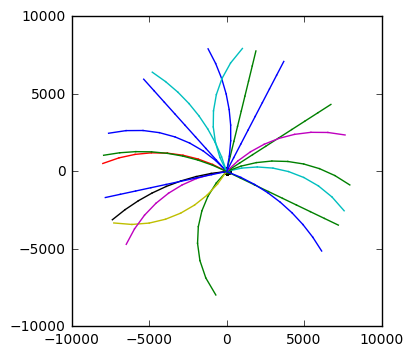

In [39]:
this_event.plotParticle_joins()

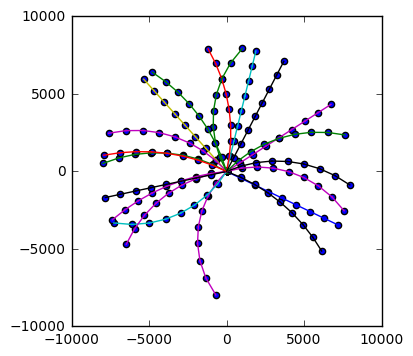

In [40]:
this_event.plotParticle_hits()

Let's look at how fast particles are generated! I believe the generation of these barcodes scales linearly so in order to generate a lot of particles all you need is time.

In [42]:
this_event.clearController()
import time

for i in range(1000, 8001, 1000): this_event.addDetector(i) #add detectors

start = time.time()
this_event.createParticles(10000) #generate 10000 particles
print "10000 particles generated in", time.time() - start, "seconds"

start = time.time()
this_event.computeallHits() #comupte all hits (8*)
print "hits for 10000 particles and 8 detectors generated in", time.time() - start, "seconds"

10000 particles generated in 0.759081125259 seconds
hits for 10000 particles and 8 detectors generated in 4.23982000351 seconds


# An example of prediction
A very rudimentary algorithm that does x y z. Here you will see a potential input being read, and hits being assigned to particles. Explain what input looks like yada yada. Reading from an input file formatted as follows:
hit barcode, particle barcode (? if not hit intersecting with first detector), [x, y] 

In [12]:
cont = pc.particleController() #could have done cont.clearController()
cont.readHits('particle_valid.csv')

Here we see what the input file looks like.

In [13]:
cont.printallHits()

1,1,[991.693005807357, 128.627299718101]
2,?,[1983.38973317544, 257.22590525498]
3,?,[2975.08646040515, 385.824510773915]
4,?,[3966.78318760027, 514.423116288365]
5,?,[4958.47991478155, 643.021721801019]
6,?,[5950.17664195591, 771.620327312777]
7,?,[6941.87336912632, 900.218932824022]
8,?,[7933.57009629425, 1028.81753833495]
9,2,[901.263860164669, -433.270647933923]
10,?,[1833.68636743255, -798.495025590013]
11,?,[2793.52636407337, -1093.71406374197]
12,?,[3776.99580771176, -1316.92925722217]
13,?,[4780.22523508478, -1466.0991446211]
14,?,[5799.23275497126, -1539.12294949704]
15,?,[6829.88939567812, -1533.82229831348]
16,?,[7867.87943654002, -1447.92029202945]
17,3,[710.75751198932, -703.437103905354]
18,?,[1421.54161578383, -1406.84733876661]
19,?,[2132.32571940904, -2110.25757346034]
20,?,[2843.10982299193, -2813.66780811218]
21,?,[3553.89392655789, -3517.07804274726]
22,?,[4264.67803011539, -4220.48827737397]
23,?,[4975.46213366805, -4923.89851199589]
24,?,[5686.24623721769, -5627.3

Note: cannot yet plot join because we don't know what hits belong to what particle!

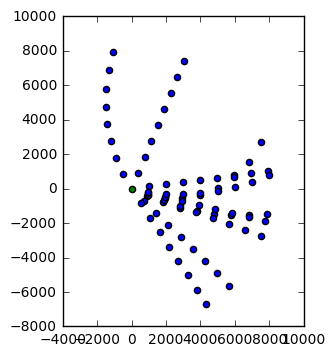

In [14]:
cont.plotallHits()

In [15]:
for i in range(1000, 8001, 1000): cont.addDetector(i) #add detectors

Next we use a very bad algorithm to predict which hits belong to which particle.

In [16]:
cont.compHitdet()
cont.predictParticles()

Let's print out the solution we got formatted as follows:
particle barcode, [all hit barcodes for hits belonging to particle]

In [17]:
cont.printSoln()

1 , [1, 2, 3, 4, 5, 6, 7, 8]
2 , [9, 10, 11, 44, 45, 46, 47, 48]
3 , [17, 18, 19, 20, 21, 22, 23, 24]
4 , [25, 42, 43, 44, 45, 46, 47, 48]
5 , [33, 34, 35, 36, 37, 38, 39, 40]
6 , [41, 42, 43, 44, 45, 46, 47, 48]
7 , [49, 50, 51, 52, 53, 54, 55, 56]
8 , [57, 58, 59, 60, 61, 62, 63, 64]
9 , [65, 66, 67, 68, 69, 70, 71, 72]
10 , [73, 74, 75, 28, 77, 78, 79, 80]


And let's see what our prediction looks like!

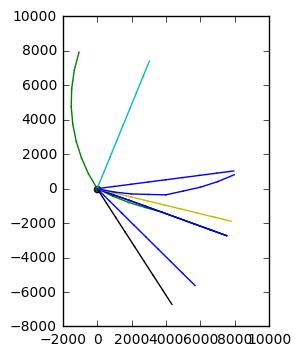

In [18]:
cont.clearPlot()
cont.plotParticle_joins()

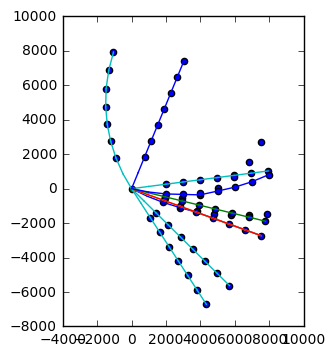

In [19]:
cont.plotallHits()

Doesn't look too good but doesn't look completely wrong. Let's score our solution now!

In [20]:
cont.moveHits()
cont.scoreSoln('particle_valid_soln.txt')

You predicted 83.75 '%' of hits correctly.
